In [70]:
import spotipy
import spotipy.util as util
from zuzana_config import Client_ID, Client_Secret
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
token = spotipy.oauth2.SpotifyClientCredentials(client_id=Client_ID, client_secret=Client_Secret)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

C:\Users\zuzan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


In [72]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id","popularity","acousticness","danceability",
                              "energy","key","loudness","mode","speechiness","instrumentalness","liveness","valence",
                              "tempo","duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"] = track["track"]["popularity"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [73]:
def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

In [74]:
playlist_dict = {"today_top_hits" : ("spotify", "37i9dQZF1DXcBWIGoYBM5M"), 
                 "billboard_100" : ("Billboard", "6UeSakyzhiEt4NB3UAd6NQ"),            
                 }

In [75]:
current_top_df = analyze_playlist_dict(playlist_dict)
current_top_df["playlist"].value_counts()

billboard_100     100
today_top_hits     50
Name: playlist, dtype: int64

In [40]:
current_top_df.count()

artist              150
album               150
track_name          150
track_id            150
popularity          150
acousticness        150
danceability        150
energy              150
key                 150
loudness            150
mode                150
speechiness         150
instrumentalness    150
liveness            150
valence             150
tempo               150
duration_ms         150
time_signature      150
playlist            150
dtype: int64

In [41]:
len(current_top_df["track_id"].unique())

129

In [69]:
duplicates_df = current_top_df[current_top_df.duplicated(["track_id"], keep="first")]
duplicates_df

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist


In [43]:
current_top_df = current_top_df.drop(duplicates_df.index)
cleaned_top_df

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Maroon 5,Nobody's Love,Nobody's Love,3kwgqoBqTwoAH4nT29TYrq,0,0.3100,0.486,0.567,1,-6.456,1,0.0379,0,0.0949,0.154,93.680,211254,4,today_top_hits
1,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,100,0.2470,0.746,0.690,11,-7.956,1,0.1640,0,0.1010,0.497,89.977,181733,4,today_top_hits
2,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,95,0.1220,0.548,0.816,0,-4.209,1,0.0465,0,0.3350,0.557,95.390,174000,4,today_top_hits
3,Taylor Swift,folklore,cardigan,4R2kfaDFhslZEMJqAFNpdd,0,0.5370,0.613,0.581,0,-8.588,0,0.0424,0.000345,0.2500,0.551,130.033,239560,4,today_top_hits
5,Jawsh 685,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),5T490vvoFNU6psep0NPmxs,87,0.2430,0.795,0.480,3,-8.556,1,0.0688,0,0.2710,0.723,149.919,171375,4,today_top_hits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Kenny Chesney,Knowing You,Here And Now,02LPxsehaIst1MW8wLtiyt,22,0.0484,0.509,0.814,9,-3.576,1,0.0532,0,0.1200,0.712,148.034,171493,4,billboard_100
146,Lil Durk,3 Headed Goat (feat. Lil Baby & Polo G),3 Headed Goat (feat. Lil Baby & Polo G),677KTHp39ZBJ9csDdgymI9,76,0.2620,0.835,0.482,8,-8.607,0,0.3670,0,0.0991,0.448,143.015,169532,4,billboard_100
147,HIXTAPE,HIXTAPE: Vol. 1,"One Beer (HARDY feat. Lauren Alaina, Devin Daw...",5FmvaZGd6fulojSToozLRD,77,0.5630,0.516,0.745,2,-8.352,1,0.0774,0,0.2750,0.825,186.004,173173,3,billboard_100
148,Pop Smoke,Shoot For The Stars Aim For The Moon,44 BullDog,7sjFIZ1g5QLJLGja3k592K,81,0.0287,0.800,0.564,8,-5.817,1,0.4000,1.65e-06,0.1120,0.318,139.989,150857,4,billboard_100


In [44]:
cleaned_top_df.describe()

,acousticness,danceability,energy,loudness,speechiness,liveness,valence,tempo
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.212847,0.686938,0.640829,-6.228566,0.108157,0.187927,0.500440,119.436264
std,0.208724,0.129846,0.132135,1.907486,0.098192,0.142207,0.219969,29.030940
min,0.001460,0.288000,0.252000,-17.540000,0.026600,0.037700,0.039600,62.948000
25%,0.031300,0.599000,0.546000,-7.258000,0.041800,0.098800,0.324000,95.987000
50%,0.168000,0.676000,0.633000,-6.130000,0.062900,0.124000,0.500000,118.961000
75%,0.308000,0.789000,0.735000,-5.022000,0.135000,0.258000,0.646000,142.037000
max,0.866000,0.961000,0.949000,-2.850000,0.481000,0.790000,0.939000,186.004000


In [45]:
playlist_id = ["37i9dQZF1DX4fpCWaHOned", "3ssqtyMsmRFCcOoAzvphwu", "4BlcsJJS5AjcKPRRgeWZz8"]
playlist_name = ["confidence_boost", "slow_down_and_breath", "sunday_morning_paris_cafe"]
username = []
for playlist in playlist_id:
    username.append(sp.playlist(playlist)["owner"]["id"])
username
my_playlist_dict = {playlist_name[i]: (username[i], playlist_id[i]) for i in range(len(playlist_name))}

In [46]:
zuzana_playlist_df = analyze_playlist_dict(my_playlist_dict)
zuzana_playlist_df["playlist"].value_counts()

sunday_morning_paris_cafe    100
confidence_boost              70
slow_down_and_breath          14
Name: playlist, dtype: int64

In [47]:
zuzana_playlist_df.head(3)

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Anne-Marie,To Be Young (feat. Doja Cat),To Be Young (feat. Doja Cat),4YAg8h8WliHZlW5wuv8Jpk,72,0.317,0.512,0.595,8,-5.131,1,0.0868,0.000013,0.113,0.253,156.044,204447,4,confidence_boost
1,R3HAB,Good Example (with Andy Grammer),Good Example (with Andy Grammer),5SspaMrPfWyRCS0GpjIxa6,72,0.427,0.456,0.496,1,-6.986,1,0.0743,0.000000,0.134,0.450,90.552,149053,4,confidence_boost
2,Bebe Rexha,"You Can't Stop The Girl (From Disney's ""Malefi...","You Can't Stop The Girl (From Disney's ""Malefi...",1i3z3GR1JtLswOSJNO0BQw,73,0.706,0.394,0.718,7,-6.336,1,0.0607,0.000000,0.116,0.247,151.912,158258,4,confidence_boost


In [48]:
zuzana_playlist_df.dtypes

artist               object
album                object
track_name           object
track_id             object
popularity           object
acousticness        float64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
playlist             object
dtype: object

In [49]:
zuzana_playlist_df["popularity"] = zuzana_playlist_df.popularity.astype(float)
#zuzana_playlist_df["duration_ms"] = zuzana_playlist_df.duration_ms.astype(float)
zuzana_playlist_df.dtypes

artist               object
album                object
track_name           object
track_id             object
popularity          float64
acousticness        float64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
playlist             object
dtype: object

In [50]:
# Normalising the loudness to scale 0 to 1 
#resource: https://towardsdatascience.com/predicting-my-mood-using-my-spotify-data-2e898add122a
from sklearn import preprocessing
loudness = zuzana_playlist_df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
zuzana_playlist_df['loudness'] = min_max_scaler.fit_transform(loudness)

In [51]:
zuzana_playlist_df

,artist,album,track_name,track_id,popularity,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Anne-Marie,To Be Young (feat. Doja Cat),To Be Young (feat. Doja Cat),4YAg8h8WliHZlW5wuv8Jpk,72.0,0.3170,0.512,0.5950,8,0.887330,1,0.0868,0.000013,0.1130,0.253,156.044,204447,4,confidence_boost
1,R3HAB,Good Example (with Andy Grammer),Good Example (with Andy Grammer),5SspaMrPfWyRCS0GpjIxa6,72.0,0.4270,0.456,0.4960,1,0.819029,1,0.0743,0.000000,0.1340,0.450,90.552,149053,4,confidence_boost
2,Bebe Rexha,"You Can't Stop The Girl (From Disney's ""Malefi...","You Can't Stop The Girl (From Disney's ""Malefi...",1i3z3GR1JtLswOSJNO0BQw,73.0,0.7060,0.394,0.7180,7,0.842962,1,0.0607,0.000000,0.1160,0.247,151.912,158258,4,confidence_boost
3,Ava Max,Salt,Salt,7vgv8KZBSo0TPzyIWG9yzV,85.0,0.1310,0.693,0.8350,6,0.956884,1,0.0623,0.000000,0.0730,0.743,128.057,180283,4,confidence_boost
4,Cyn,Drinks,Drinks,7c2ag2Q4vhJyjDANataJj2,65.0,0.0591,0.818,0.8030,0,0.828344,1,0.1290,0.000087,0.0930,0.340,141.916,150227,4,confidence_boost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Stacey Kent,Let Yourself Go,They All Laughed,65fnZKBFxJhscLwq1fjcy5,32.0,0.9500,0.767,0.1790,0,0.598549,1,0.0492,0.000605,0.2020,0.395,123.819,270040,4,sunday_morning_paris_cafe
180,Stacey Kent,Collection III,You've Got a Friend,5bnuugKXvRZ79X1i7DrS6F,29.0,0.9490,0.738,0.0823,11,0.368754,1,0.0376,0.006120,0.1080,0.377,94.784,260693,4,sunday_morning_paris_cafe
181,Madeleine Peyroux,Half The Perfect World,California Rain,2eWy89cJoA6hswNiOD2nEh,32.0,0.9680,0.707,0.2290,9,0.506536,1,0.0465,0.045100,0.1160,0.472,112.995,176987,4,sunday_morning_paris_cafe
182,Kings of Convenience,Declaration Of Dependence,Boat Behind,3ooB1pAGbXWfm74Jqh7Zfh,51.0,0.8460,0.714,0.3330,0,0.599028,1,0.0280,0.023100,0.1540,0.647,94.857,220600,4,sunday_morning_paris_cafe


In [52]:
# create table and transpose 
compare_playlists = zuzana_playlist_df.groupby("playlist").mean().T
compare_playlists

playlist,confidence_boost,slow_down_and_breath,sunday_morning_paris_cafe
popularity,72.600000,23.000000,22.420000
acousticness,0.148654,0.848400,0.741797
danceability,0.661071,0.310400,0.623480
energy,0.706957,0.155116,0.324724
loudness,0.881218,0.336247,0.609479
speechiness,0.103051,0.042221,0.045753
instrumentalness,0.000781,0.611132,0.072454
liveness,0.184004,0.155193,0.144732
valence,0.495240,0.156779,0.477532
tempo,120.773714,108.406714,115.299590


In [53]:
features_df = compare_playlists.drop(['popularity', 'tempo','speechiness', 'liveness'])
features_df

playlist,confidence_boost,slow_down_and_breath,sunday_morning_paris_cafe
acousticness,0.148654,0.848400,0.741797
danceability,0.661071,0.310400,0.623480
energy,0.706957,0.155116,0.324724
loudness,0.881218,0.336247,0.609479
instrumentalness,0.000781,0.611132,0.072454
valence,0.495240,0.156779,0.477532


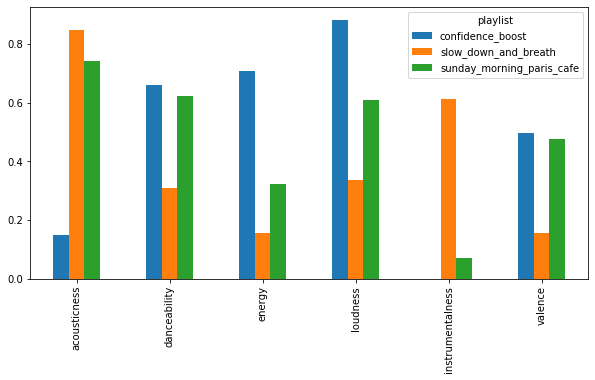

<Figure size 432x288 with 0 Axes>

In [54]:
#plt.figure(figsize=(20,3))
#lt.bar(x_axis, comparison_playlist["confidence_boost"], color='r', alpha=0.5, align ="center")
#plt.xticks(tick_locations, index, rotation="vertical")
features_df.plot(kind="bar", figsize=(10,5))
plt.show()
plt.tight_layout()

In [55]:
sp.track('spotify:track:4GiXBCUF7H6YfNQsnBRIzl')['popularity']

50

In [58]:
sp.track('spotify:track:4GiXBCUF7H6YfNQsnBRIzl')

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3bGXaFVQLASmDMdjjeJr8a'},
    'href': 'https://api.spotify.com/v1/artists/3bGXaFVQLASmDMdjjeJr8a',
    'id': '3bGXaFVQLASmDMdjjeJr8a',
    'name': 'Montgomery Gentry',
    'type': 'artist',
    'uri': 'spotify:artist:3bGXaFVQLASmDMdjjeJr8a'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AR',
   'AT',
   'AU',
   'BA',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'BY',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HR',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JO',
   'JP',
   'KW',
   'KZ',
   'LB',
   'LI',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'MD',
   'ME',
   'MK',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL',
   

In [59]:
sp.track('spotify:track:4GiXBCUF7H6YfNQsnBRIzl')['album']['release_date']

'2006-10-24'

In [60]:
sp.track('spotify:track:50RBM1j1Dw7WYmsGsWg9Tm')

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5rX2c1zow6hCph8PnnU3kF'},
    'href': 'https://api.spotify.com/v1/artists/5rX2c1zow6hCph8PnnU3kF',
    'id': '5rX2c1zow6hCph8PnnU3kF',
    'name': 'Astrud Gilberto',
    'type': 'artist',
    'uri': 'spotify:artist:5rX2c1zow6hCph8PnnU3kF'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2oXajFtteT0sZGBredQOfH'},
  'href': 'https://api.spotify.com/v1/albums/2oXajFtteT0sZGBredQOfH',
  'id': '2oXajFtteT0sZGBredQOfH',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b273a71417f690017dc5bcbc8e79',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e02a71417f690017dc5bcbc8e79',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d00004851a71417f690017dc5bcbc8e79',
    'width': 64}],
  'name': "Jazz 'Round Midnight: Astrud Gilberto",
  'release_date'

In [66]:
cleaned_top_df.dtypes

artist               object
album                object
track_name           object
track_id             object
popularity           object
acousticness        float64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
playlist             object
dtype: object